# Loading appropriate libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

In [3]:
df=pd.read_csv('../input/heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Variable Clarification

The dataset needed some clarification in terms of variables:

1.age: In years

2.sex: 1 = male, 0 = female

3.cp: Chest pain rating - Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic

4.trestbps: Resting blood pressure measurement in mmHg

5.chol: Cholesterol measurement in mg/dl

6.fbs: Fasting blood sugar > 120 mg/dl - 1 = true, 0 = false

7.restecg: Resting electrocardiographic measurement - 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy

8.thalach: Maximum heart rate recorded

9.exang: Exercise induced angina - 1 = yes, 0 = no

10.oldpeak: ST depression induced by exercise relative to rest

11.slope: The slope of the peak exercise ST segment - Value 1: upsloping, Value 2: flat, Value 3: downsloping

12.ca: The number of major vessels - 0-3

13.thal: A blood disorder called thalassemia - 3 = normal, 6 = fixed defect, 7 = reversable defect

14.target: Heart disease - 0 = no, 1 = yes


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


## Creating Test Variables

In [18]:
chest_pain=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
df=pd.concat([df,chest_pain],axis=1)
df.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(df['slope'],prefix='slope')
th=pd.get_dummies(df['thal'],prefix='thal')
rest_ecg=pd.get_dummies(df['restecg'],prefix='restecg')
frames=[df,sp,th,rest_ecg]
df=pd.concat(frames,axis=1)
df.drop(['slope','thal','restecg'],axis=1,inplace=True)

In [19]:
df.head(5)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0


In [20]:
X = df.drop(['target'], axis = 1)
y = df.target.values

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Importing the Keras libraries and packages

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

Using TensorFlow backend.


## Neural Network

In [24]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation = "relu", input_dim = 22, units = 11, kernel_initializer = "uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation = "relu", units = 11, kernel_initializer = "uniform"))

# Adding the output layer
classifier.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = "uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the model

In [25]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6927 - acc: 0.5331
Epoch 2/100
242/242 [==============================] - 0s 153us/step - loss: 0.6886 - acc: 0.5702
Epoch 3/100
242/242 [==============================] - 0s 145us/step - loss: 0.6723 - acc: 0.8182
Epoch 4/100
242/242 [==============================] - 0s 134us/step - loss: 0.6301 - acc: 0.8347
Epoch 5/100
242/242 [==============================] - 0s 165us/step - loss: 0.5589 - acc: 0.8388
Epoch 6/100
242/242 [==============================] - 0s 150us/step - loss: 0.4812 - acc: 0.8430
Epoch 7/100
242/242 [==============================] - 0s 146us/step - loss: 0.4239 - acc: 0.8347
Epoch 8/100
242/242 [==============================] - 0s 130us/step - loss: 0.3870 - acc: 0.8430
Epoch 9/100
242/242 [==============================] - 0s 136us/step - loss: 0.3671 - acc: 0.8554
Epoch 10/100
242/242 [==============================] - 0s 148us/step - loss: 0.3550 - acc: 0.8595
Epoch 11/100
242/242 

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([[1.34237915e-01],
       [8.61468434e-01],
       [8.45422864e-01],
       [9.97000933e-03],
       [3.91319692e-02],
       [1.98377848e-01],
       [4.18093801e-02],
       [8.17578137e-02],
       [1.08629465e-04],
       [1.60655379e-03],
       [9.98394728e-01],
       [9.90907907e-01],
       [3.34424376e-02],
       [9.88490462e-01],
       [9.99484360e-01],
       [9.27104831e-01],
       [3.86932492e-02],
       [9.98848617e-01],
       [2.24722624e-02],
       [9.99997854e-01],
       [9.92404103e-01],
       [1.48428977e-01],
       [7.65067339e-02],
       [1.77367032e-01],
       [9.60102439e-01],
       [1.89230174e-01],
       [7.71957040e-02],
       [2.06471920e-01],
       [9.99492884e-01],
       [9.28311527e-01],
       [9.70459223e-01],
       [3.04958224e-03],
       [9.99518037e-01],
       [9.92172718e-01],
       [9.99553561e-01],
       [6.39466941e-02],
       [8.96421075e-03],
       [6.42832518e-01],
       [2.68522501e-02],
       [1.88904494e-01],


accuracy of the model:  0.8360655737704918


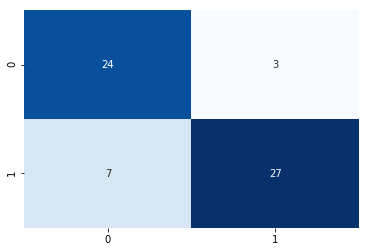

In [27]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)

#accuracy score

ac=accuracy_score(y_test, y_pred.round())
print('Neural Network Accuracy: ',ac)

RandomForest_accuracy: 0.8032786885245902


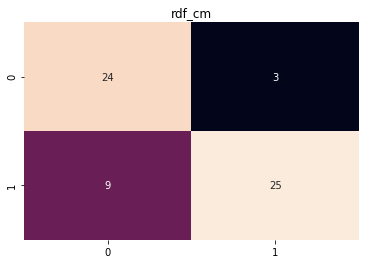

In [28]:
from sklearn.ensemble import RandomForestClassifier

rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,fmt="d",cbar=False)
print('RandomForest accuracy:',rdf_ac)

In [29]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

nb_ac = accuracy_score(y_pred, y_test)
print('Naive Bayes accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8689


Text(0.5, 1.0, 'Model Accuracy')

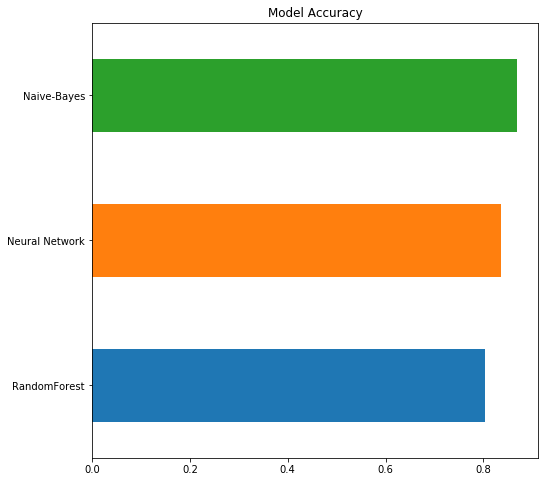

In [31]:
model_accuracy = pd.Series(data=[rdf_ac,nb_ac, ac], 
        index=['RandomForest','Naive-Bayes', 'Neural Network'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')